# Group 1 Project Proposal
Members:\
 Loay Al-Abri,
 Daniel Pliego,
 John Jiang,
 Justin Lee.


In [1]:
#Import the required libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Introduction
Heart disease is a common term used to refer to different heart conditions which may lead to heart attacks, heart failure, or arrhythmia (irregular heartbeat). According to the Centers for Disease Control and Prevention, high blood pressure and high blood cholesterol are key risk factors. Additionally, age generally seems to correlate with these aforementioned factors.
The question we would like to answer is: can we predict if a subject has heart disease using age, resting blood pressure, and cholesterol as predictors?\
We will be using the processed switzerland dataset from the heart disease database provided by the UCI Machine Learning Repository. This dataset includes the three predictors we want to use to predict if a given subject has a heart disease or not.


### Preliminary exploratory data analysis:
The Heart disease dataset is a dataset from UCI Machine Learning Repository. UCI is an educational database and after revising their policies, we are allowed to scrap the data. We will read the data into $R$ by passing the data URL to `read_csv` function and assigning column names to the columns because the data doesn't include the column names.

In [2]:
#Reading the data and renaming the columns.
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data"
colmns_names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restceg", "thalach",
               "exang", "oldpeak", "slope", "ca", "thal", "heart_disease")

heart_data <- read_csv(url, col_names = colmns_names)|>
    #Change the data type in the columns to the necessary data type for our classification
    mutate(across(c(trestbps, fbs, restceg, thalach, exang, oldpeak, slope, ca, thal),
                as.numeric),
          heart_disease = ifelse(heart_disease == "1" | heart_disease == "2" | 
                                 heart_disease == "3" | heart_disease == "4", "True", heart_disease),
          heart_disease = ifelse(heart_disease == "0", "False", heart_disease),
          heart_disease = as.factor(heart_disease))
# Preview the data
head(heart_data)

Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, fbs, restceg, thalach, exang, oldpeak, slope, ca, thal
dbl (5): age, sex, cp, chol, heart_disease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning me

age,sex,cp,trestbps,chol,fbs,restceg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,True
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,True
35,1,4,NA,0,NA,0,130,1,NA,NA,NA,7,True
36,1,4,110,0,NA,0,125,1,1.0,2,NA,6,True
38,0,4,105,0,NA,0,166,0,2.8,1,NA,NA,True
38,0,4,110,0,0,0,156,0,0.0,2,NA,3,True


In [3]:
set.seed(2023) #set the seed for reproducibility

# Split the data into trainig and testing data
heart_split <- initial_split(heart_data, prop = 0.75, strata = heart_disease )
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

##### Now, we create a table to observe any important information that we can get about the data such as: missing values and average values for the predictors. This step is important so we know how our data looks like.

In [4]:
heart_data_selected <- heart_train |> select(age, trestbps, chol, heart_disease)

heart_summary <- heart_train |>
    select(age, trestbps, chol, heart_disease)|>
    group_by(heart_disease) |>
    summarize(num_obs = n(),
              mean_age = mean(age, na.rm = TRUE), 
              mean_trestbps = mean(trestbps, na.rm = TRUE),
              mean_chol = mean(chol, na.rm = TRUE),
              missing_vals = sum(is.na(heart_data)),
              missing_vals_in_predictors = sum(is.na(heart_data_selected)))
heart_summary

heart_disease,num_obs,mean_age,mean_trestbps,mean_chol,missing_vals,missing_vals_in_predictors
<fct>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
False,6,55.66667,123.3333,0,273,1
True,86,55.72093,131.0000,0,273,1


From the table above, we observe that there are 273 missing values. However, those values are not in the columns that we want to use as predictors. We have only one missing value in the columns that we want to use (as seen in `missing_vals_in_predictors`, thus they will not affect our classification.

Now we want to see the relation between the predictors that we will use in the classification. We can plot each of the predictors against each other to see the results.

Warning message:
“Removed 1 rows containing missing values (geom_point).”


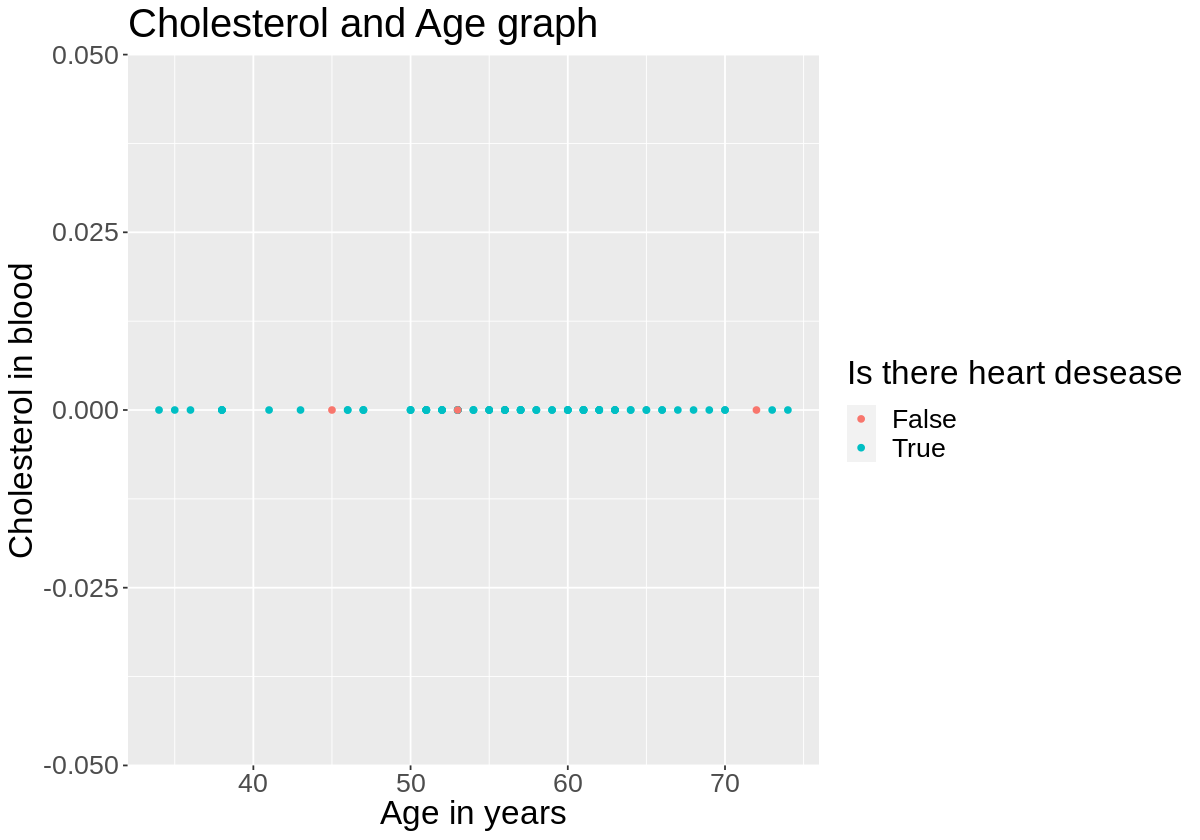

ERROR: Error in ggplot(heart_train_scaled, aes(x = trestbps, y = chol)): object 'heart_train_scaled' not found


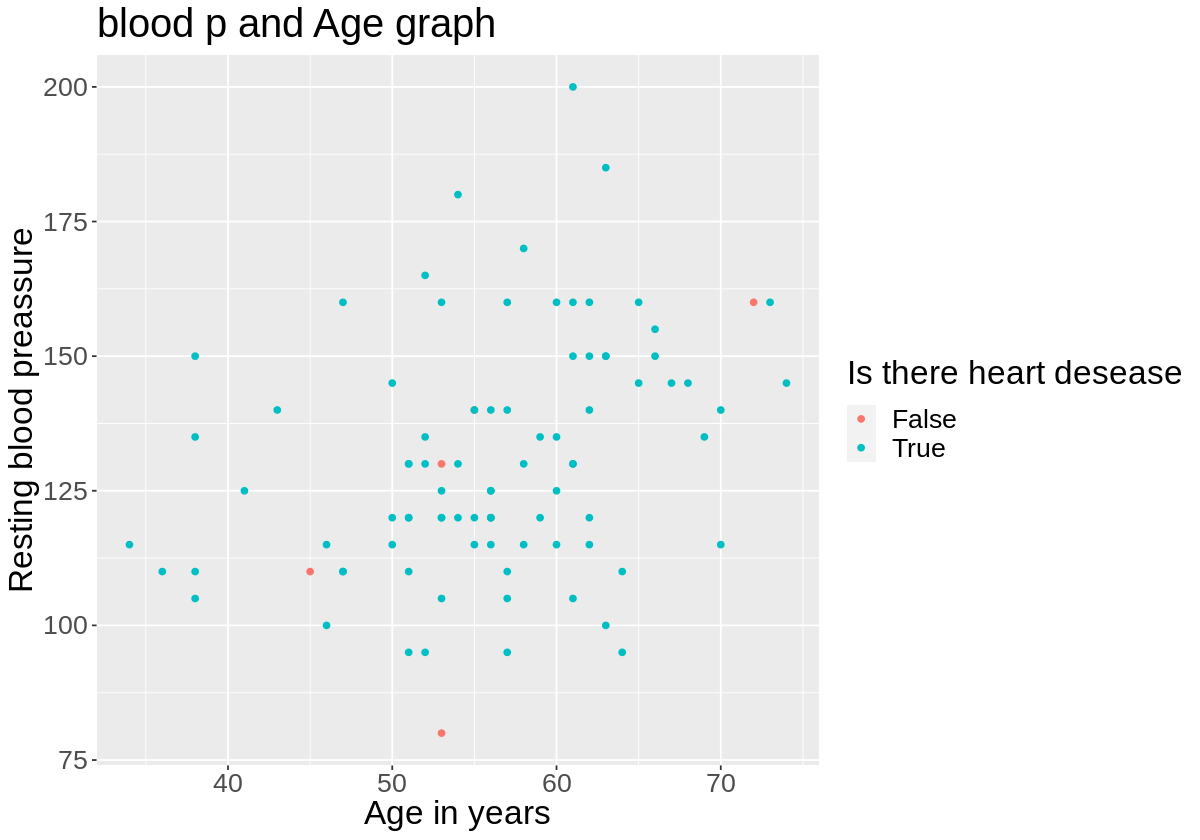

In [5]:
options(repr.plot.width = 10, repr.plot.height = 7) 

age_chol_plot <- heart_train |>
ggplot(aes(x = age, y = chol)) +
       geom_point(aes(color = heart_disease)) +
labs (x = "Age in years", y = "Cholesterol in blood", color = "Is there heart desease", title = "Cholesterol and Age graph")+
    theme(text = element_text(size=20))

age_chol_plot


age_trestbps_plot <- heart_train |>
ggplot(aes(x = age, y = trestbps)) +
       geom_point(aes(color = heart_disease)) +
labs (x = "Age in years", y = "Resting blood preassure", color = "Is there heart desease", title = "blood p and Age graph")+
    theme(text = element_text(size=20))
age_trestbps_plot

chol_trestbps_plot <- heart_train_scaled |>
ggplot(aes(x = trestbps, y = chol)) +
       geom_point(aes(color = heart_disease)) +
labs (x = "Resting blood preassure", y = "Cholesterol in blood", color = "Is there heart desease", title = "Cholesterol and Age graph")+
    theme(text = element_text(size=20))
chol_trestbps_plot

### Methods
We will be using prediction by classification to predict whether the patient would have heart disease or not using predictors including age, resting blood pressure, and cholesterol. Potential correlations/conclusions can be drawn by plotting the three predictors against each other on a scatter plot using data from the database. We decided to select these three predictors because it is known that abnormal blood pressure and cholesterol levels are often associated with heart diseases and age can be a significant factor that influences blood pressure and cholesterol level if not given enough care.


### Expected Outcomes and significance
In this project, we aim to create a model that predicts whether a patient has heart disease or not based on their age, cholesterol, and resting blood pressure. The level of accuracy our model can achieve has yet to be determined, but if the outcome is promising, we want this model to be easily accessible to the general public and allow people to seek medical attention early before the condition worsens. Moreover, if the predictors are deemed significant, it is important to bring such knowledge to the general public’s attention and highlight the importance of regulating blood pressure and cholesterol levels. However, if the statistical tests show that there is little or insignificant correlation between the predictors and the development of heart diseases, we will investigate other unconsidered factors that could potentially increase the accuracy of our model significantly. It is also important to consider whether the model can be utilized universally. We want to be certain that our model can maintain its level of accuracy when applied to a different country as it bases its prediction solely on the surveyed patients in Switzerland.

